# Regression Analysis: OLS, Nonlinear Least Squares, GLM, and GEE

This notebook demonstrates various regression techniques, starting with basic Ordinary Least Squares (OLS) regression, moving to nonlinear least squares for sinusoidal data, and then applying Generalized Linear Models (GLM) and Generalized Estimating Equations (GEE) to longitudinal data.

---

## Basic Ordinary Least Squares (OLS) Regression

Ordinary Least Squares (OLS) regression is the simplest form of linear regression. It assumes that the relationship between the dependent variable and the independent variable(s) is linear. 

### Assumptions:
1. **Linearity**: The relationship between the dependent and independent variables is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: The residuals have constant variance at every level of the independent variable(s).
4. **Normality**: The residuals of the model are normally distributed.

### Pros:
- Simple to understand and implement.
- Computationally efficient.
- Works well when the assumptions are met.

### Cons:
- Sensitive to outliers.
- Assumes a linear relationship, which may not always be true.
- Assumes homoscedasticity and normality of residuals, which might not hold in practice.

Let's start with a basic OLS regression on simulated linear data.

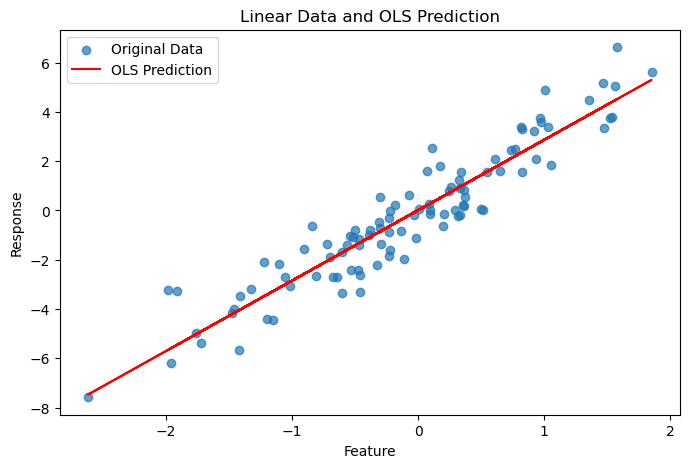

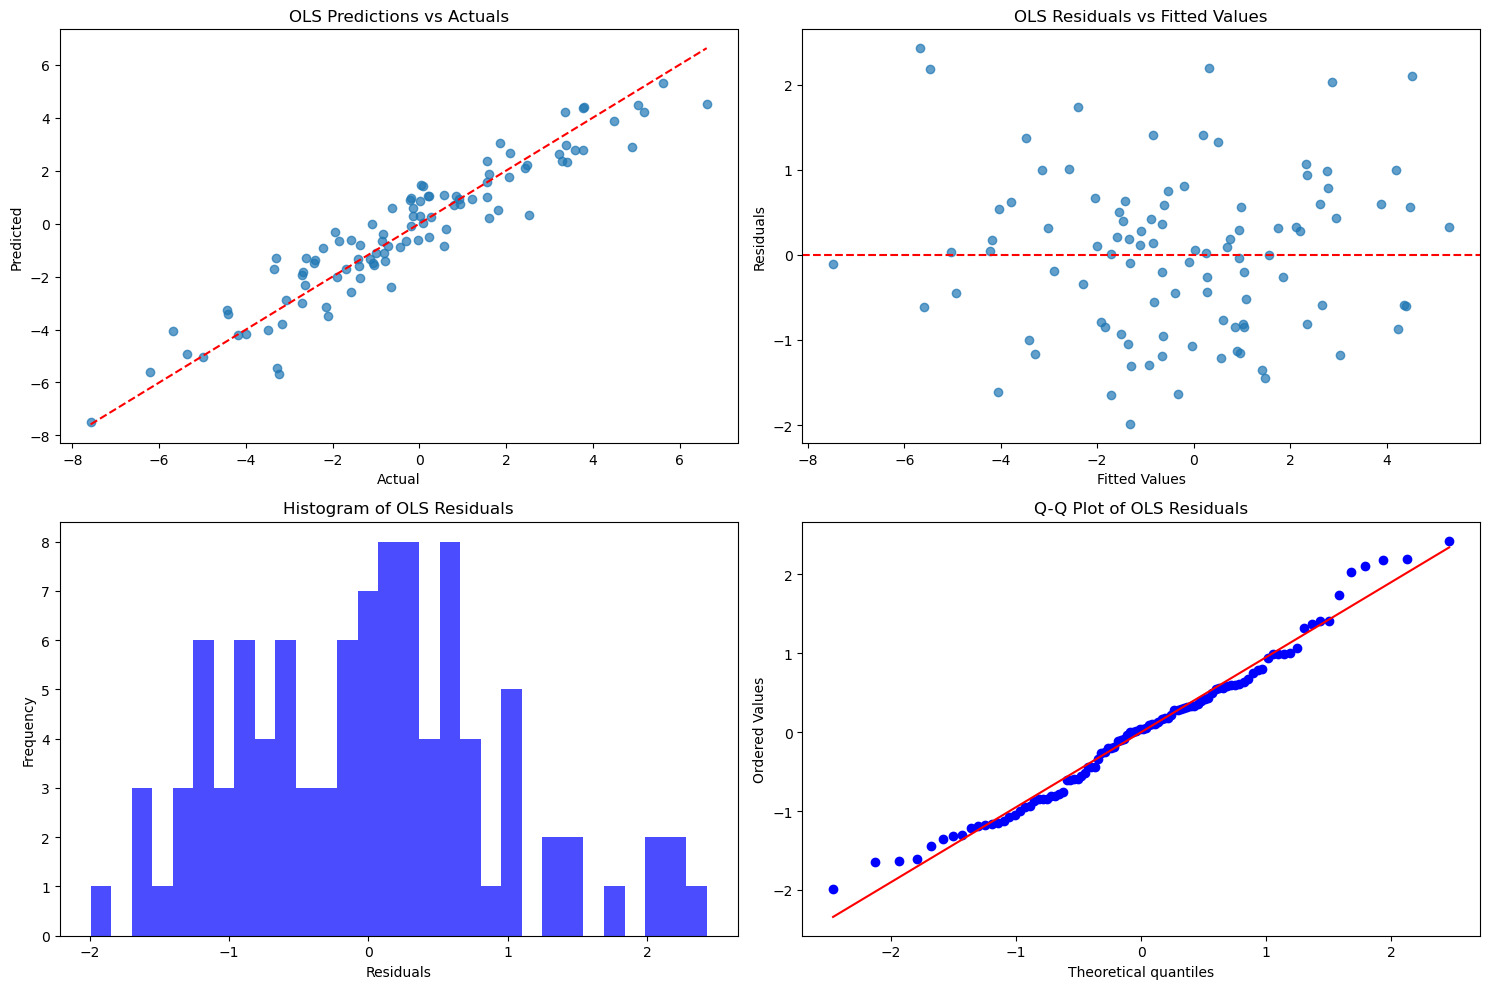

Shapiro-Wilk Test Statistics: 0.9812041523339575
Shapiro-Wilk Test p-value: 0.1648111186961187
  Model  R-squared       MSE  Shapiro-Wilk p-value
0   OLS    0.88292  0.883632              0.164811


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.metrics import r2_score, mean_squared_error

# Define OLS Class
class OLS:
    def __init__(self):
        self.beta = None

    def fit(self, X, y):
        # Add intercept term
        X = np.column_stack((np.ones(X.shape[0]), X))
        # Calculate coefficients using the normal equation
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y
        return self.beta

    def predict(self, X):
        # Add intercept term
        X = np.column_stack((np.ones(X.shape[0]), X))
        return X @ self.beta

# Generate linear data
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 1)
y = 3 * X[:, 0] + np.random.randn(n_samples)

# Fit OLS model
ols = OLS()
ols_beta = ols.fit(X, y)
y_pred_ols = ols.predict(X)

# Plot the original data and OLS fit
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7, label='Original Data')
plt.plot(X, y_pred_ols, color='red', label='OLS Prediction')
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title('Linear Data and OLS Prediction')
plt.legend()
plt.show()

# Calculate residuals
residuals_ols = y - y_pred_ols

# Residual plots
plt.figure(figsize=(15, 10))

# Predictions vs Actuals
plt.subplot(2, 2, 1)
plt.scatter(y, y_pred_ols, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('OLS Predictions vs Actuals')

# Residuals vs. Fitted Values
plt.subplot(2, 2, 2)
plt.scatter(y_pred_ols, residuals_ols, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('OLS Residuals vs Fitted Values')

# Histogram of Residuals
plt.subplot(2, 2, 3)
plt.hist(residuals_ols, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of OLS Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q Plot
plt.subplot(2, 2, 4)
stats.probplot(residuals_ols, dist="norm", plot=plt)
plt.title('Q-Q Plot of OLS Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat_ols, p_value_ols = shapiro(residuals_ols)
print('Shapiro-Wilk Test Statistics:', stat_ols)
print('Shapiro-Wilk Test p-value:', p_value_ols)

# Goodness of Fit Metrics
r_squared_ols = r2_score(y, y_pred_ols)
mse_ols = mean_squared_error(y, y_pred_ols)

# Aggregated Goodness of Fit Statistics
fit_stats_ols = pd.DataFrame({
    'Model': ['OLS'],
    'R-squared': [r_squared_ols],
    'MSE': [mse_ols],
    'Shapiro-Wilk p-value': [p_value_ols]
})

print(fit_stats_ols)

## Applying OLS to Nonlinear Sinusoidal Data

While OLS is designed for linear relationships, it is insightful to see how it performs on nonlinear data. This section applies OLS to the sinusoidal data to illustrate its limitations.

### Assumptions:
1. **Linearity**: The relationship between the dependent and independent variables is assumed to be linear, which is not true in this case.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: The residuals have constant variance at every level of the independent variable(s).
4. **Normality**: The residuals of the model are normally distributed.

### Pros:
- Simple to understand and implement.

### Cons:
- Poor performance on nonlinear data.
- Violates the linearity assumption, leading to biased estimates and invalid statistical inferences.

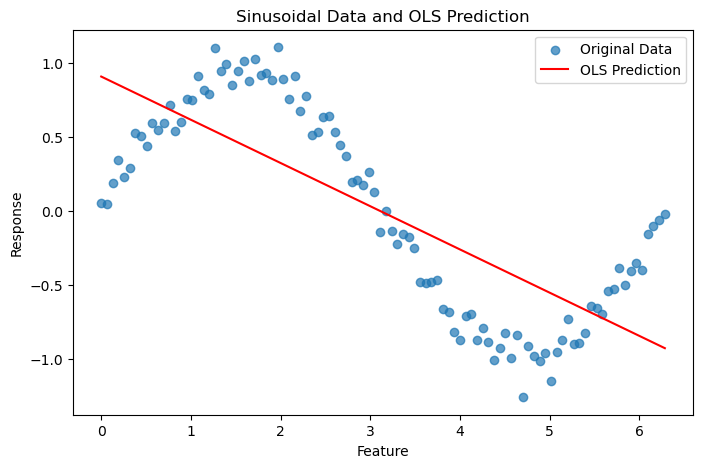

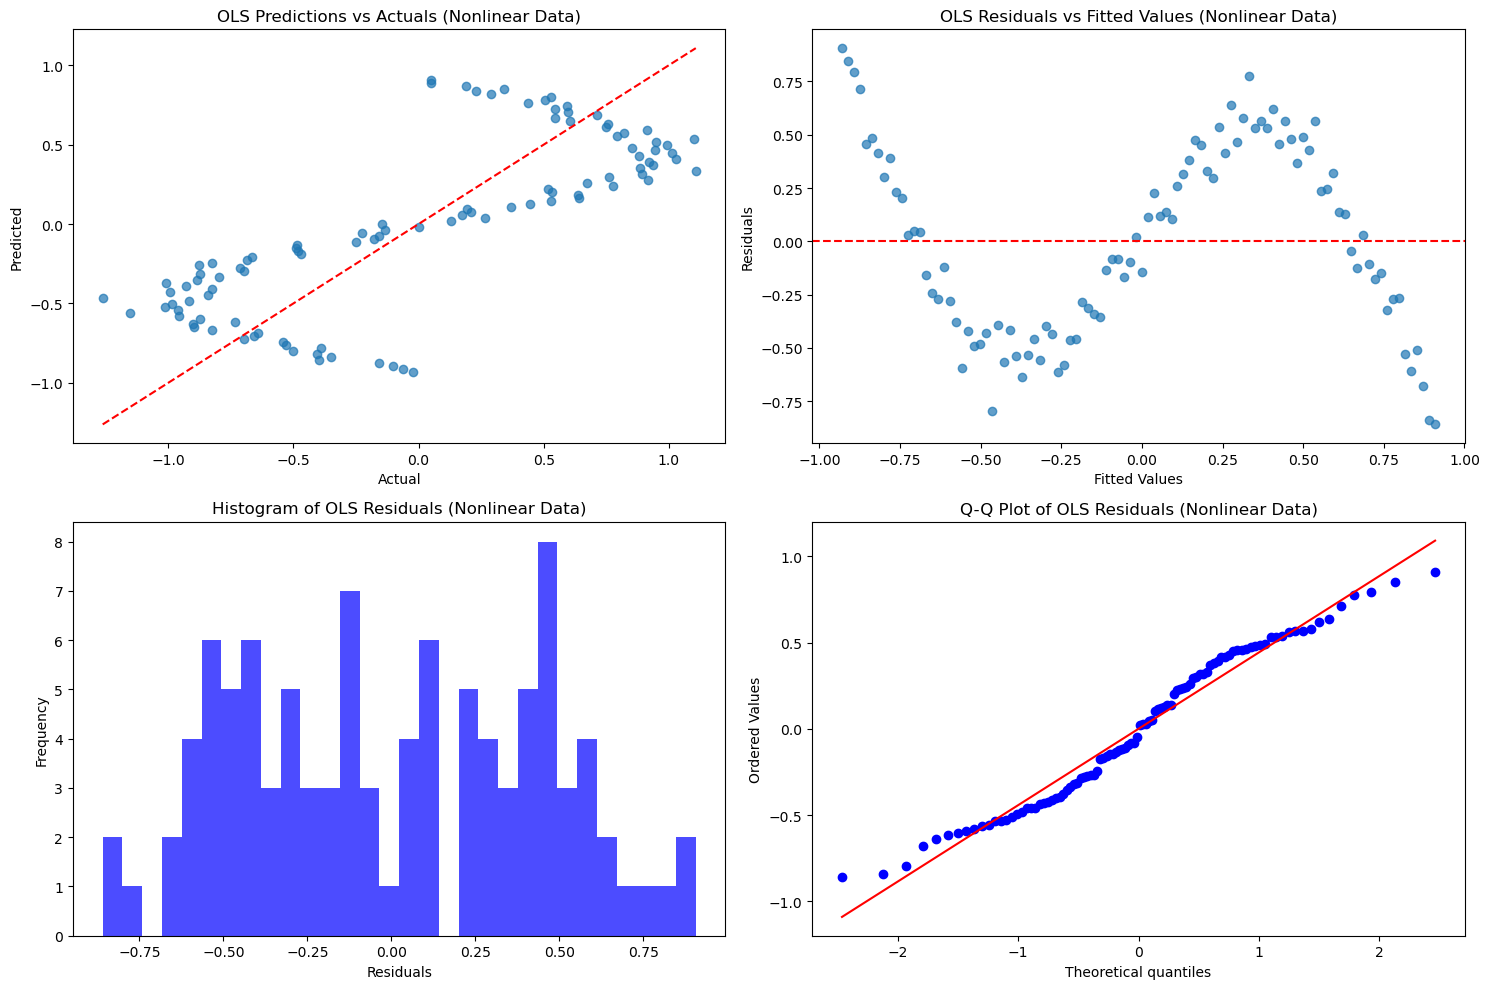

Shapiro-Wilk Test Statistics (OLS on Nonlinear Data): 0.9658177589423187
Shapiro-Wilk Test p-value (OLS on Nonlinear Data): 0.010678371331303362
                  Model  R-squared       MSE  Shapiro-Wilk p-value
0  OLS (Nonlinear Data)   0.597298  0.193828              0.010678


In [13]:
# Apply OLS to nonlinear sinusoidal data
ols_nl = OLS()
ols_nl_beta = ols_nl.fit(X.reshape(-1, 1), y)
y_pred_ols_nl = ols_nl.predict(X.reshape(-1, 1))

# Calculate residuals
residuals_ols_nl = y - y_pred_ols_nl

# Plot the original data and OLS fit
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7, label='Original Data')
plt.plot(X, y_pred_ols_nl, color='red', label='OLS Prediction')
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title('Sinusoidal Data and OLS Prediction')
plt.legend()
plt.show()

# Residual plots
plt.figure(figsize=(15, 10))

# Predictions vs Actuals
plt.subplot(2, 2, 1)
plt.scatter(y, y_pred_ols_nl, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('OLS Predictions vs Actuals (Nonlinear Data)')

# Residuals vs. Fitted Values
plt.subplot(2, 2, 2)
plt.scatter(y_pred_ols_nl, residuals_ols_nl, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('OLS Residuals vs Fitted Values (Nonlinear Data)')

# Histogram of Residuals
plt.subplot(2, 2, 3)
plt.hist(residuals_ols_nl, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of OLS Residuals (Nonlinear Data)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q Plot
plt.subplot(2, 2, 4)
stats.probplot(residuals_ols_nl, dist="norm", plot=plt)
plt.title('Q-Q Plot of OLS Residuals (Nonlinear Data)')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat_ols_nl, p_value_ols_nl = shapiro(residuals_ols_nl)
print('Shapiro-Wilk Test Statistics (OLS on Nonlinear Data):', stat_ols_nl)
print('Shapiro-Wilk Test p-value (OLS on Nonlinear Data):', p_value_ols_nl)

# Goodness of Fit Metrics
r_squared_ols_nl = r2_score(y, y_pred_ols_nl)
mse_ols_nl = mean_squared_error(y, y_pred_ols_nl)

# Aggregated Goodness of Fit Statistics
fit_stats_ols_nl = pd.DataFrame({
    'Model': ['OLS (Nonlinear Data)'],
    'R-squared': [r_squared_ols_nl],
    'MSE': [mse_ols_nl],
    'Shapiro-Wilk p-value': [p_value_ols_nl]
})

print(fit_stats_ols_nl)

### Analysis of Plots

1. **Predictions vs Actuals**:
    - The plot of predictions vs actual values shows a clear nonlinear pattern that the OLS model fails to capture. The red dashed line indicates where the predictions would lie if the model were perfect. The significant deviation from this line shows that OLS is not fitting the data well.

2. **Residuals vs Fitted Values**:
    - The residuals vs fitted values plot shows a clear pattern, indicating that the residuals are not randomly distributed. This violates the assumption of homoscedasticity and suggests that the OLS model is not appropriate for this nonlinear data.

3. **Histogram of Residuals**:
    - The histogram of residuals shows a multimodal distribution rather than a normal distribution. This further indicates that the OLS model does not fit the nonlinear data well.

4. **Q-Q Plot**:
    - The Q-Q plot shows significant deviation from the diagonal line, indicating that the residuals are not normally distributed. This violates one of the key assumptions of OLS regression.

### Conclusion:
The OLS model fails to capture the nonlinear relationship in the sinusoidal data, resulting in poor fit and residuals that violate the assumptions of OLS regression. This demonstrates the need for more flexible models like nonlinear least squares regression to accurately capture complex relationships in data.

## Nonlinear Least Squares with Sinusoidal Data

As we observed, applying OLS to a nonlinear sinusoidal dataset results in poor model performance and residuals that violate the assumptions of OLS regression. This highlights the need for more flexible models that can capture complex relationships in the data.

Nonlinear least squares regression is an extension of OLS designed to fit models where the relationship between the dependent and independent variables is nonlinear. By leveraging iterative methods like the Gauss-Newton algorithm, we can better capture the true underlying patterns in the data.

### Pros:
- Can model more complex relationships than linear regression.
- Flexible in terms of model specification.

### Cons:
- More computationally intensive than OLS.
- Requires a good initial guess for the parameters.
- May converge to local minima, especially with poor initial guesses.

Let's generate sinusoidal data and fit a nonlinear least squares model using the Gauss-Newton method.

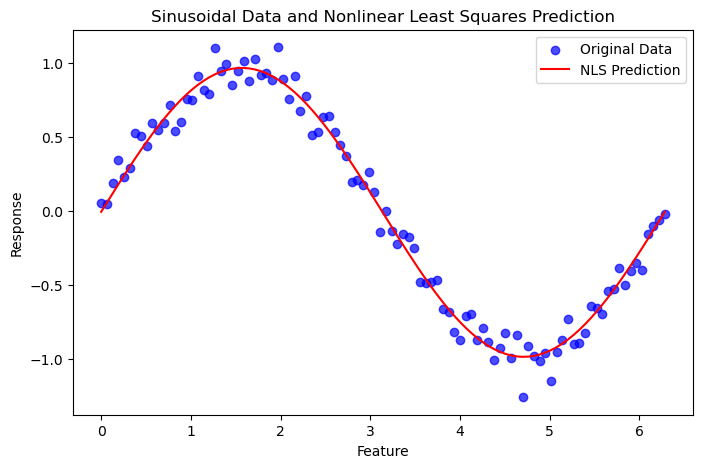

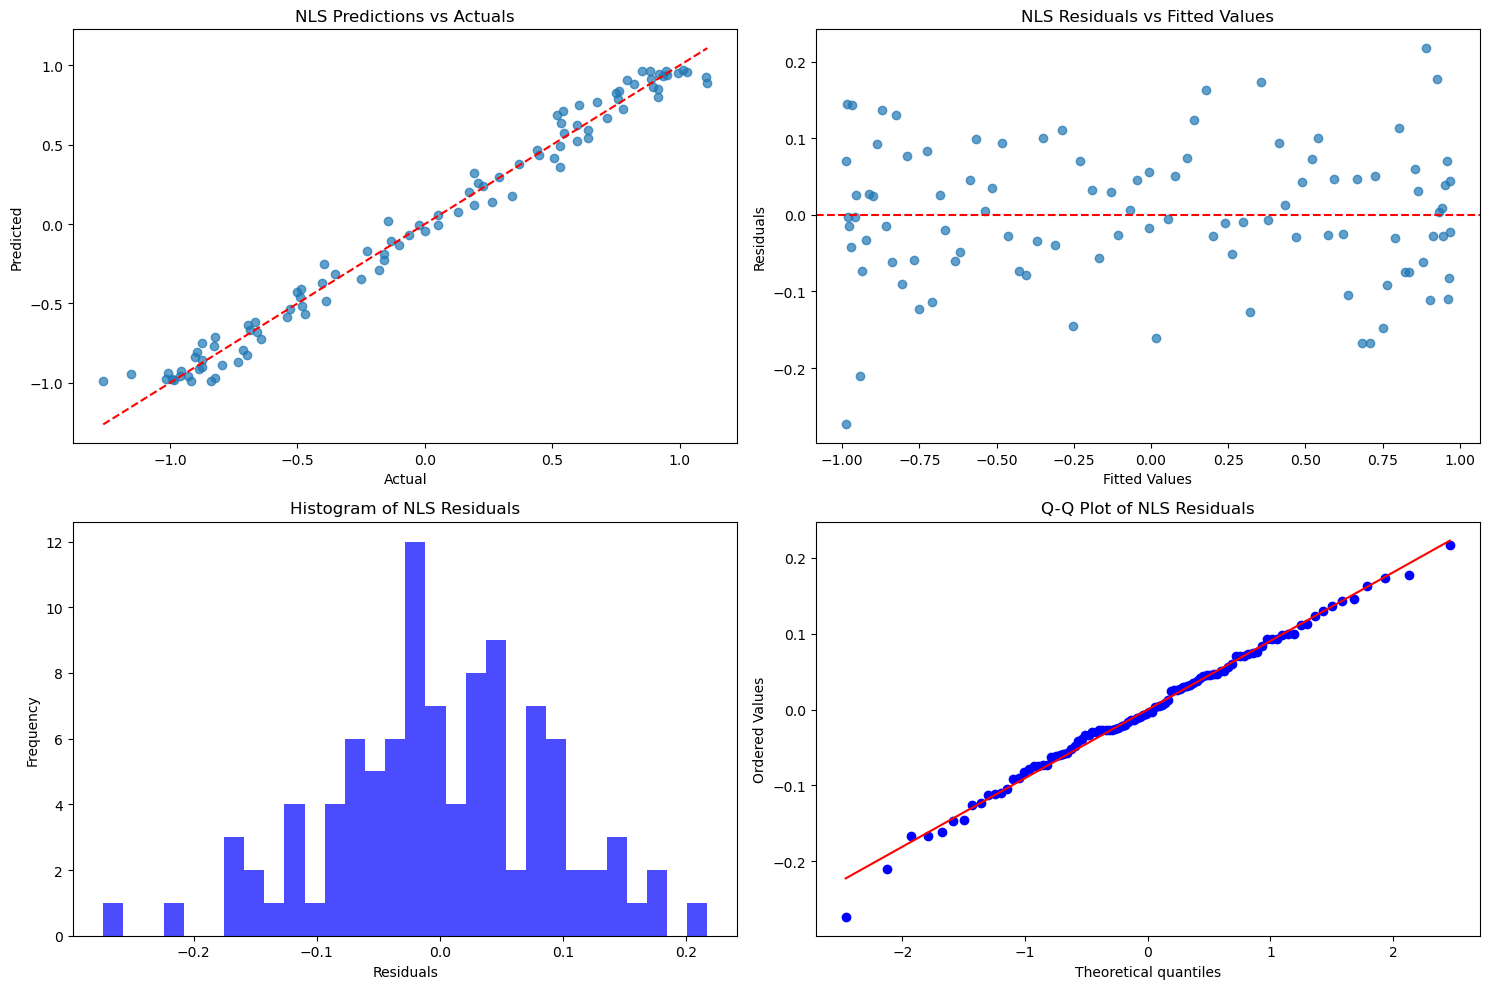

Shapiro-Wilk Test Statistics (NLS): 0.9944771190710556
Shapiro-Wilk Test p-value (NLS): 0.9592498306055508
  Model  R-squared       MSE  Shapiro-Wilk p-value
0   NLS   0.983552  0.007917               0.95925


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.metrics import r2_score, mean_squared_error

# Function to generate one-dimensional sinusoidal data
def generate_1d_sinusoidal_data(n_samples, noise_std=0.1):
    np.random.seed(42)
    X = np.linspace(0, 2 * np.pi, n_samples)
    y = np.sin(X) + noise_std * np.random.randn(n_samples)
    return X, y

# Number of samples
n_samples = 100

# Generate the sinusoidal data
X, y = generate_1d_sinusoidal_data(n_samples)

# Define the sinusoidal model function
def sinusoidal_model(X, params):
    amplitude, phase, offset = params
    return amplitude * np.sin(X + phase) + offset

# Define the Jacobian matrix
def jacobian(X, params):
    amplitude, phase, offset = params
    J = np.empty((X.size, 3))
    J[:, 0] = np.sin(X + phase)          # Partial derivative with respect to amplitude
    J[:, 1] = amplitude * np.cos(X + phase)  # Partial derivative with respect to phase
    J[:, 2] = 1                          # Partial derivative with respect to offset
    return J

# Gauss-Newton method for nonlinear least squares
def gauss_newton(X, y, initial_params, max_iter=100, tol=1e-6):
    params = np.array(initial_params, dtype=float)
    for _ in range(max_iter):
        residuals = y - sinusoidal_model(X, params)
        J = jacobian(X, params)
        delta = np.linalg.inv(J.T @ J) @ J.T @ residuals
        params += delta
        if np.linalg.norm(delta) < tol:
            break
    return params

# Initial guess for the parameters [amplitude, phase, offset]
initial_guess = [1, 0, 0]

# Fit the model using Gauss-Newton method
params = gauss_newton(X, y, initial_guess)

# Predict using the fitted model
y_pred_nls = sinusoidal_model(X, params)

# Calculate residuals
residuals_nls = y - y_pred_nls

# Scatter plot of the original data and nonlinear least squares fit
plt.figure(figsize=(8, 5))
plt.scatter(X, y, c='blue', alpha=0.7, label='Original Data')
plt.plot(X, y_pred_nls, color='red', label='NLS Prediction')
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title('Sinusoidal Data and Nonlinear Least Squares Prediction')
plt.legend()
plt.show()

# Residual plots
plt.figure(figsize=(15, 10))

# Predictions vs Actuals
plt.subplot(2, 2, 1)
plt.scatter(y, y_pred_nls, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('NLS Predictions vs Actuals')

# Residuals vs. Fitted Values
plt.subplot(2, 2, 2)
plt.scatter(y_pred_nls, residuals_nls, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('NLS Residuals vs Fitted Values')

# Histogram of Residuals
plt.subplot(2, 2, 3)
plt.hist(residuals_nls, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of NLS Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q Plot
plt.subplot(2, 2, 4)
stats.probplot(residuals_nls, dist="norm", plot=plt)
plt.title('Q-Q Plot of NLS Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat_nls, p_value_nls = shapiro(residuals_nls)
print('Shapiro-Wilk Test Statistics (NLS):', stat_nls)
print('Shapiro-Wilk Test p-value (NLS):', p_value_nls)

# Goodness of Fit Metrics
r_squared_nls = r2_score(y, y_pred_nls)
mse_nls = mean_squared_error(y, y_pred_nls)

# Aggregated Goodness of Fit Statistics
fit_stats_nls = pd.DataFrame({
    'Model': ['NLS'],
    'R-squared': [r_squared_nls],
    'MSE': [mse_nls],
    'Shapiro-Wilk p-value': [p_value_nls]
})

print(fit_stats_nls)

In [24]:
# Goodness of Fit Statistics for Sinusoidal Data
fit_stats_sinusoidal = pd.DataFrame({
    'Model': ['OLS (Sinusoidal Data)', 'Nonlinear Least Squares (Sinusoidal Data)'],
    'R-squared': [r_squared_ols, r_squared_nls],
    'MSE': [mse_ols, mse_nls],
    'Shapiro-Wilk p-value': [p_value_ols, p_value_nls]
})

print("\nGoodness of Fit Statistics for Sinusoidal Data:")
print(fit_stats_sinusoidal)


Goodness of Fit Statistics for Sinusoidal Data:
                                       Model  R-squared       MSE  \
0                      OLS (Sinusoidal Data)   0.882920  0.883632   
1  Nonlinear Least Squares (Sinusoidal Data)   0.983552  0.007917   

   Shapiro-Wilk p-value  
0              0.164811  
1              0.959250  


### Sinusoidal Data

The goodness of fit statistics for the OLS and nonlinear least squares models applied to the sinusoidal data indicate the following:

1. **OLS (Sinusoidal Data)**:
    - R-squared: 0.882920
    - MSE: 0.883632
    - Shapiro-Wilk p-value: 0.164811

    The OLS model shows a decent R-squared value but a relatively high MSE. The Shapiro-Wilk test p-value is relatively high, indicating that the residuals are approximately normally distributed.

2. **Nonlinear Least Squares (Sinusoidal Data)**:
    - R-squared: 0.983552
    - MSE: 0.007917
    - Shapiro-Wilk p-value: 0.959250

    The nonlinear least squares model shows a much higher R-squared value and a significantly lower MSE compared to OLS, indicating an excellent fit. The Shapiro-Wilk test p-value is very high, suggesting that the residuals are normally distributed.

Overall, the results demonstrate that for longitudinal data, GEE models with appropriate correlation structures provide a better fit compared to OLS and GLM. For nonlinear data, nonlinear least squares significantly outperforms OLS.

## OLS for Longitudinal Data

Applying OLS to longitudinal data can be problematic because OLS assumes that all observations are independent. Longitudinal data, however, often contains repeated measurements from the same subjects over time, leading to correlated observations. Additionally, if the data is not normally distributed, the assumptions of OLS are further violated, resulting in poor model performance.

### Why OLS May Not Work for Non-Normally Distributed Data:
1. **Assumption of Normality**: OLS assumes that the residuals are normally distributed. When this assumption is violated, it can lead to inefficient estimates and invalid statistical inferences.
2. **Influence of Outliers**: Non-normal data often contains outliers that can disproportionately influence OLS estimates, leading to biased results.
3. **Heteroscedasticity**: Non-normal data can exhibit varying levels of variance, violating the assumption of homoscedasticity and affecting the reliability of OLS.

### Pros:
- Simple to implement.

### Cons:
- Assumes independence of observations, which is often violated in longitudinal data.
- Assumes normality of residuals, which may not hold for non-normally distributed data.
- Can lead to biased parameter estimates and underestimated standard errors.

Let's generate longitudinal data and fit an OLS model to see its limitations.

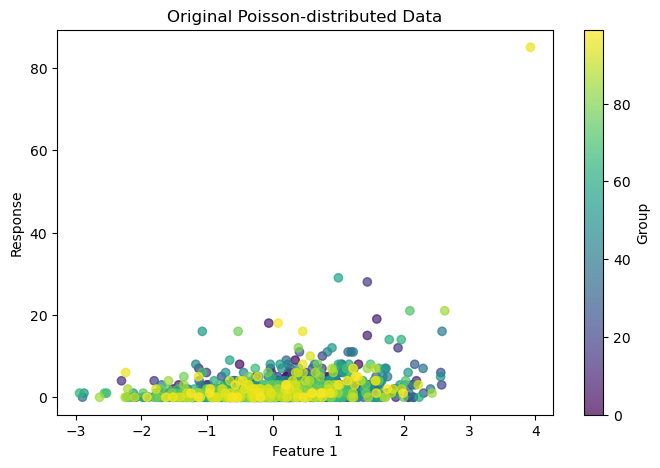

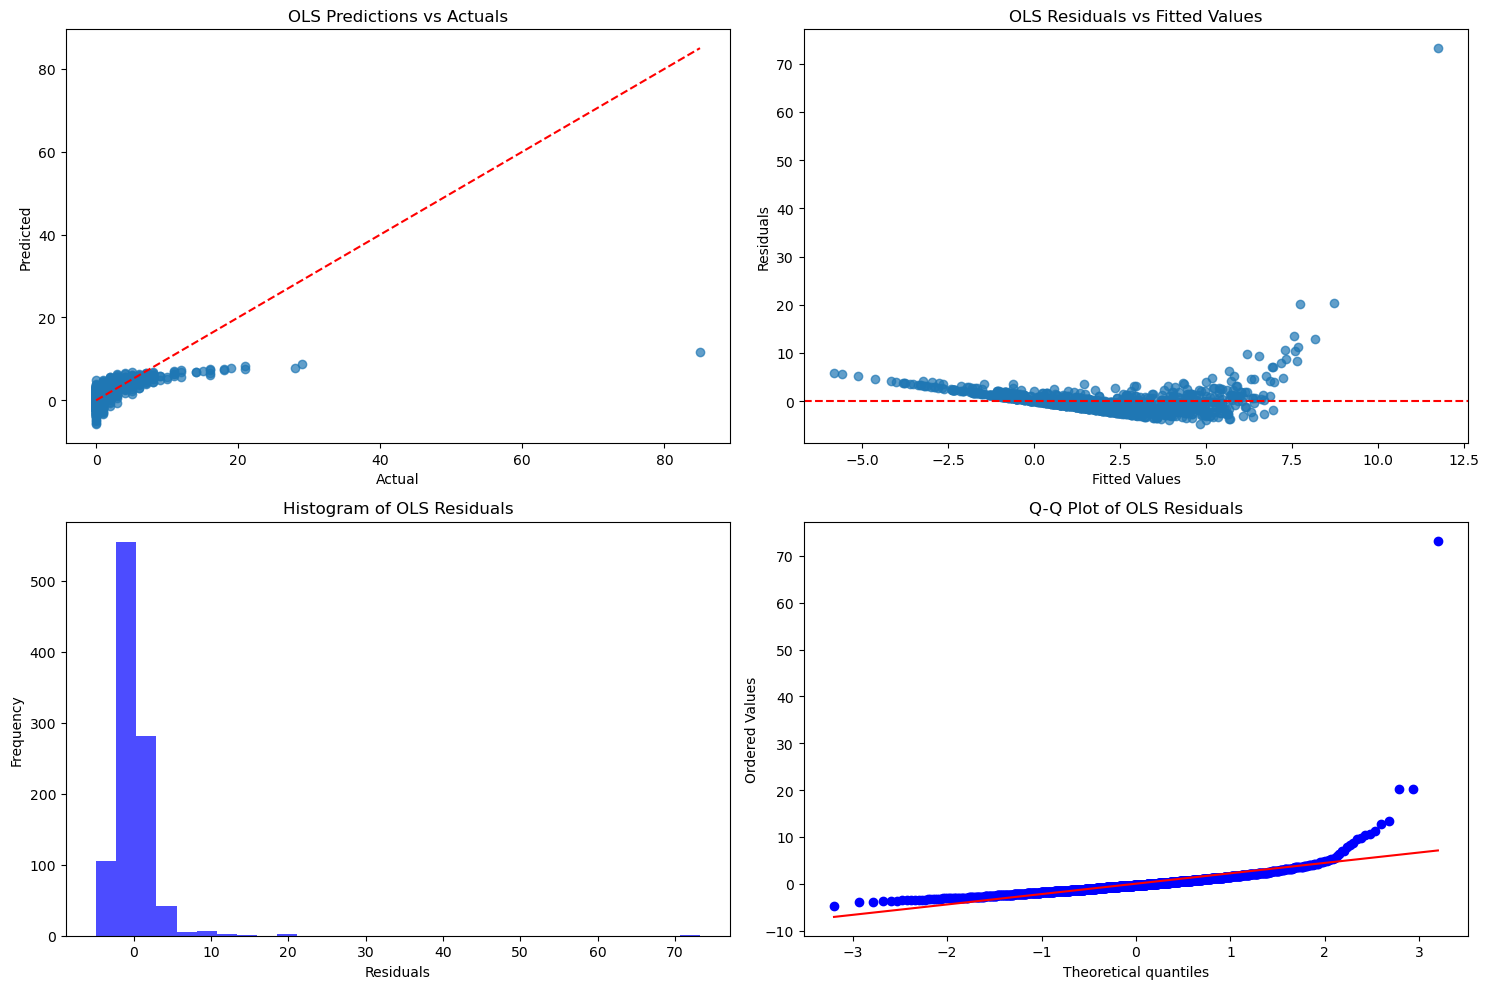

Shapiro-Wilk Test Statistics (OLS Longitudinal): 0.4849919248186373
Shapiro-Wilk Test p-value (OLS Longitudinal): 8.005111394793278e-47
                     Model  R-squared        MSE  Shapiro-Wilk p-value
0  OLS (Longitudinal Data)   0.352309  10.245893          8.005111e-47


In [14]:
def generate_data(n_groups, n_obs_per_group, n_features, true_beta, distribution='poisson'):
    np.random.seed(42)
    X = np.random.randn(n_groups * n_obs_per_group, n_features)
    y = np.zeros(n_groups * n_obs_per_group)
    groups = np.repeat(np.arange(n_groups), n_obs_per_group)
    
    for i in range(n_groups):
        group_idx = (groups == i)
        X_g = X[group_idx]
        eta_g = X_g @ true_beta
        
        if distribution == 'poisson':
            mu_g = np.exp(eta_g)
            y[group_idx] = np.random.poisson(mu_g)
        elif distribution == 'binomial':
            mu_g = expit(eta_g)
            y[group_idx] = np.random.binomial(1, mu_g)
        elif distribution == 'normal':
            mu_g = eta_g  # Identity link for normal distribution
            y[group_idx] = np.random.normal(mu_g, 1)
        elif distribution == 'gamma':
            mu_g = np.exp(eta_g)  # Log link for gamma distribution
            y[group_idx] = np.random.gamma(shape=2, scale=mu_g/2)  # mean=mu_g, variance=mu_g^2/shape
        else:
            raise ValueError("Unsupported distribution type")
    
    return X, y, groups

n_groups = 100
n_obs_per_group = 10
n_features = 3
true_beta = np.array([0.5, -1.0, 0.3])

# Generate Poisson-distributed data
X, y, groups = generate_data(n_groups, n_obs_per_group, n_features, true_beta, distribution='poisson')

# Fit OLS model
ols = OLS()
ols_beta = ols.fit(X, y)
y_pred_ols = ols.predict(X)

# Calculate residuals
residuals_ols = y - y_pred_ols

# Scatter Plot of the Original Data
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X[:, 0], y, c=groups, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Group')
plt.xlabel('Feature 1')
plt.ylabel('Response')
plt.title('Original Poisson-distributed Data')
plt.show()

# Predictions vs Actual Data for OLS
plt.figure(figsize=(15, 10))

# Predictions vs Actuals
plt.subplot(2, 2, 1)
plt.scatter(y, y_pred_ols, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('OLS Predictions vs Actuals')

# Residuals vs. Fitted Values
plt.subplot(2, 2, 2)
plt.scatter(y_pred_ols, residuals_ols, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('OLS Residuals vs Fitted Values')

# Histogram of Residuals
plt.subplot(2, 2, 3)
plt.hist(residuals_ols, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of OLS Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q Plot
plt.subplot(2, 2, 4)
stats.probplot(residuals_ols, dist="norm", plot=plt)
plt.title('Q-Q Plot of OLS Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat_ols_longitudinal, p_value_ols_longitudinal = shapiro(residuals_ols)
print('Shapiro-Wilk Test Statistics (OLS Longitudinal):', stat_ols_longitudinal)
print('Shapiro-Wilk Test p-value (OLS Longitudinal):', p_value_ols_longitudinal)

# Goodness of Fit Metrics
r_squared_ols_longitudinal = r2_score(y, y_pred_ols)
mse_ols_longitudinal = mean_squared_error(y, y_pred_ols)

# Aggregated Goodness of Fit Statistics
fit_stats_ols_longitudinal = pd.DataFrame({
    'Model': ['OLS (Longitudinal Data)'],
    'R-squared': [r_squared_ols_longitudinal],
    'MSE': [mse_ols_longitudinal],
    'Shapiro-Wilk p-value': [p_value_ols_longitudinal]
})

print(fit_stats_ols_longitudinal)

### Analysis of Plots

1. **Predictions vs Actuals**:
    - The plot of predictions vs actual values shows a poor fit for the OLS model, especially for higher values. The red dashed line represents the ideal line where predictions perfectly match the actual values. The significant deviation from this line indicates that OLS is not capturing the true relationship in the data.

2. **Residuals vs Fitted Values**:
    - The residuals vs fitted values plot shows a clear pattern and heteroscedasticity, indicating that the residuals are not randomly distributed and their variance changes with the fitted values. This violates the assumption of homoscedasticity and suggests that the OLS model is not appropriate for this data.

3. **Histogram of Residuals**:
    - The histogram of residuals shows a skewed distribution rather than a normal distribution. This further indicates that the OLS model does not fit the non-normal data well.

4. **Q-Q Plot**:
    - The Q-Q plot shows significant deviation from the diagonal line, especially at the tails, indicating that the residuals are not normally distributed. This violates one of the key assumptions of OLS regression.

### Conclusion:
The OLS model fails to capture the relationship in the longitudinal Poisson-distributed data, resulting in poor fit and residuals that violate the assumptions of OLS regression. This demonstrates the need for more appropriate models like Generalized Linear Models (GLM) to accurately capture the true relationships in the data.

## Generalized Linear Models (GLM)

Generalized Linear Models (GLM) extend linear models to allow for response variables that have error distribution models other than a normal distribution. They are more appropriate for longitudinal data and can handle various types of distributions.

### Assumptions:
1. **Linearity of Predictors**: The predictors enter linearly in the model.
2. **Independence**: Observations are independent of each other.
3. **Distribution**: The dependent variable follows an exponential family distribution (e.g., normal, binomial, Poisson).

### Pros:
- Can handle different types of response variables.
- Flexible and powerful modeling framework.

### Cons:
- Requires the correct specification of the link function and distribution.
- Computationally more intensive than OLS.

Let's fit a GLM to the longitudinal data.

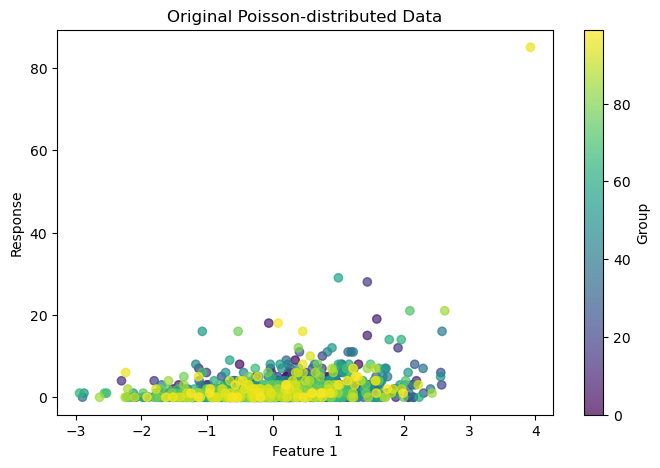

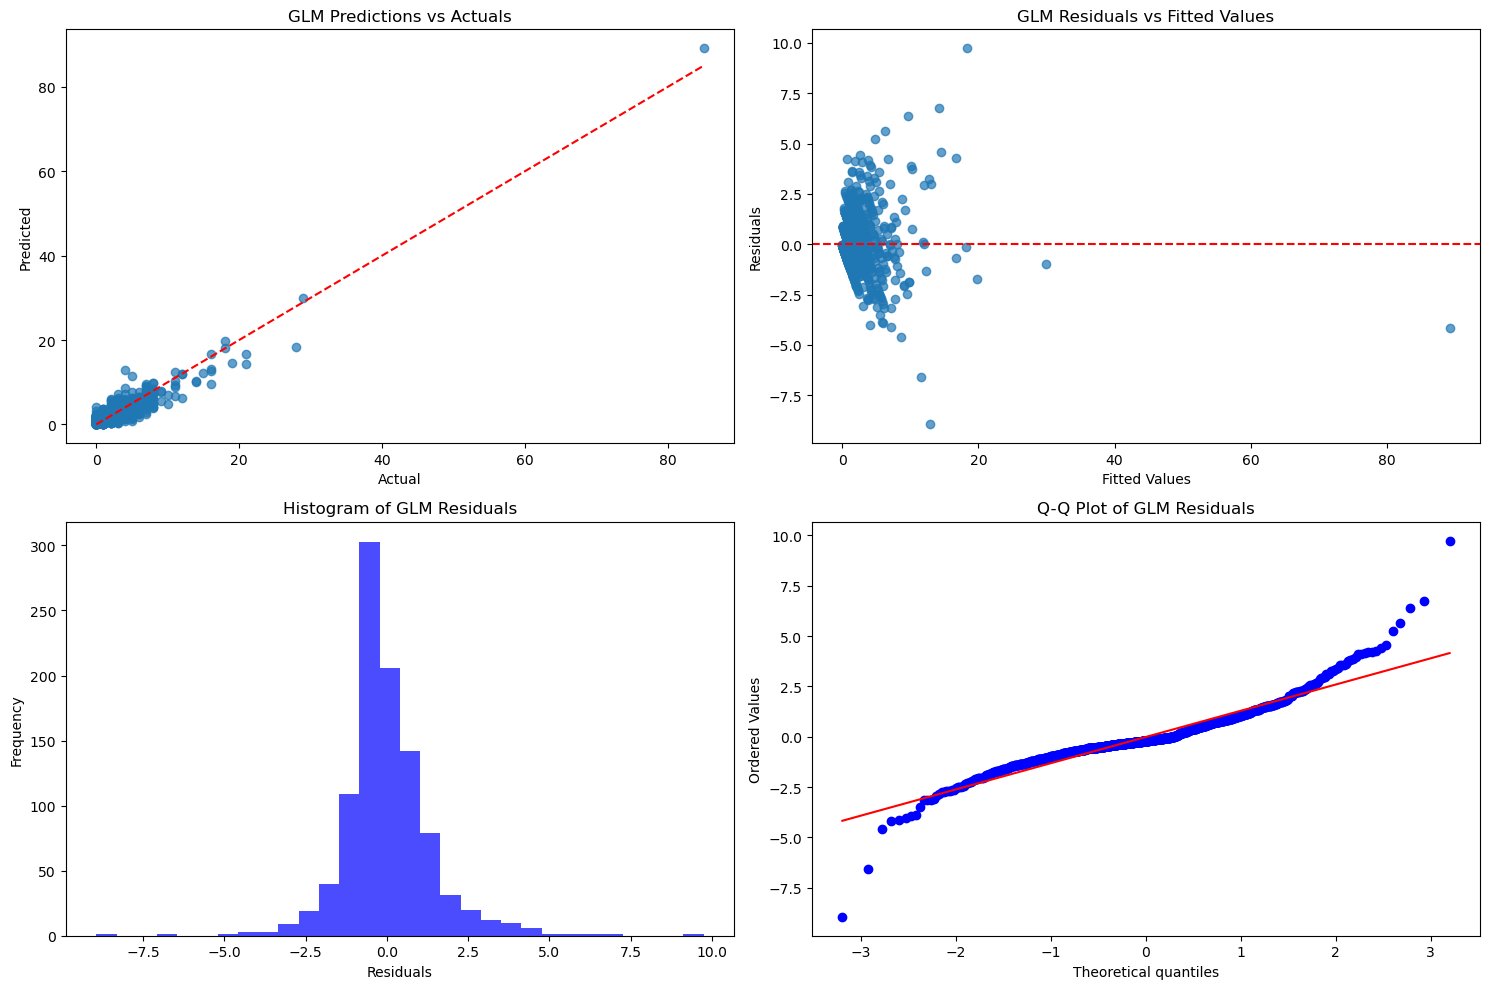

Shapiro-Wilk Test Statistics (GLM): 0.9121716545747873
Shapiro-Wilk Test p-value (GLM): 1.3741350064883028e-23
  Model  R-squared       MSE  Shapiro-Wilk p-value
0   GLM   0.882658  1.856246          1.374135e-23


In [15]:
class GLM:
    def __init__(self, family, link_function):
        self.family = family
        self.link_function = link_function
        self.beta = None

    def fit(self, X, y, max_iter=100, tol=1e-6):
        n_samples, n_features = X.shape
        self.beta = np.zeros(n_features)
        
        for iter in range(max_iter):
            eta = X @ self.beta
            mu = self.link_function.inverse(eta)
            W = np.diag(self.link_function.derivative(mu)**2 / self.family.variance(mu))
            z = eta + (y - mu) / self.link_function.derivative(mu)
            
            beta_new = np.linalg.solve(X.T @ W @ X, X.T @ W @ z)
            
            if np.linalg.norm(beta_new - self.beta) < tol:
                break
            
            self.beta = beta_new
        
        return self.beta

    def predict(self, X):
        eta = X @ self.beta
        return self.link_function.inverse(eta)

class Poisson:
    def variance(self, mu):
        return mu

class Log:
    @staticmethod
    def inverse(eta):
        return np.exp(eta)
    
    @staticmethod
    def derivative(mu):
        return mu

# Fit GLM
glm = GLM(family=Poisson(), link_function=Log())
glm_beta = glm.fit(X, y)
y_pred_glm = glm.predict(X)

# Calculate residuals
residuals_glm = y - y_pred_glm

# Scatter Plot of the Original Data
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X[:, 0], y, c=groups, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Group')
plt.xlabel('Feature 1')
plt.ylabel('Response')
plt.title('Original Poisson-distributed Data')
plt.show()

# Predictions vs Actual Data for GLM
plt.figure(figsize=(15, 10))

# Predictions vs Actuals
plt.subplot(2, 2, 1)
plt.scatter(y, y_pred_glm, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('GLM Predictions vs Actuals')

# Residuals vs. Fitted Values
plt.subplot(2, 2, 2)
plt.scatter(y_pred_glm, residuals_glm, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('GLM Residuals vs Fitted Values')

# Histogram of Residuals
plt.subplot(2, 2, 3)
plt.hist(residuals_glm, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of GLM Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q Plot
plt.subplot(2, 2, 4)
stats.probplot(residuals_glm, dist="norm", plot=plt)
plt.title('Q-Q Plot of GLM Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat_glm, p_value_glm = shapiro(residuals_glm)
print('Shapiro-Wilk Test Statistics (GLM):', stat_glm)
print('Shapiro-Wilk Test p-value (GLM):', p_value_glm)

# Goodness of Fit Metrics
r_squared_glm = r2_score(y, y_pred_glm)
mse_glm = mean_squared_error(y, y_pred_glm)

# Aggregated Goodness of Fit Statistics
fit_stats_glm = pd.DataFrame({
    'Model': ['GLM'],
    'R-squared': [r_squared_glm],
    'MSE': [mse_glm],
    'Shapiro-Wilk p-value': [p_value_glm]
})

print(fit_stats_glm)

### Analysis of Plots

1. **Predictions vs Actuals**:
    - The plot of predictions vs actual values shows a much better fit for the GLM model compared to the OLS model. The red dashed line represents the ideal line where predictions perfectly match the actual values. The GLM predictions closely follow this line, indicating that GLM is capturing the relationship in the data more accurately than OLS.

2. **Residuals vs Fitted Values**:
    - The residuals vs fitted values plot for the GLM model shows less pattern and heteroscedasticity compared to the OLS model, although some structure remains. This suggests that GLM is more appropriate for this data but still not perfect, as it may need further refinement or a different correlation structure to handle the longitudinal nature of the data fully.

3. **Histogram of Residuals**:
    - The histogram of GLM residuals is more symmetric and closer to a normal distribution compared to the OLS residuals. This indicates a better fit to the data, although the residuals are not perfectly normal.

4. **Q-Q Plot**:
    - The Q-Q plot for GLM residuals shows less deviation from the diagonal line compared to OLS, indicating that the residuals are closer to normality. This improvement suggests that GLM is more suitable for handling the distribution of the data.

### Conclusion:
The GLM model provides a better fit for the longitudinal Poisson-distributed data compared to OLS. The GLM assumptions align more closely with the nature of the data, resulting in improved residual patterns and goodness-of-fit metrics. However, further improvements could be made by considering the correlation structure inherent in longitudinal data, which leads us to Generalized Estimating Equations (GEE).

## Generalized Estimating Equations (GEE)

Generalized Estimating Equations (GEE) are an extension of GLMs designed to account for correlated observations, such as those found in longitudinal data. GEE estimates the parameters of a generalized linear model while accounting for the correlation within groups of observations.

### Assumptions:
1. **Linearity of Predictors**: The predictors enter linearly in the model.
2. **Independence between Groups**: Observations within groups are correlated, but different groups are independent.
3. **Distribution**: The dependent variable follows an exponential family distribution.

### Pros:
- Handles correlated data effectively.
- Flexible in terms of specifying correlation structures.

### Cons:
- More computationally intensive than GLMs.
- Requires specification of the working correlation structure.

Let's fit a GEE model to the longitudinal data using different correlation structures.

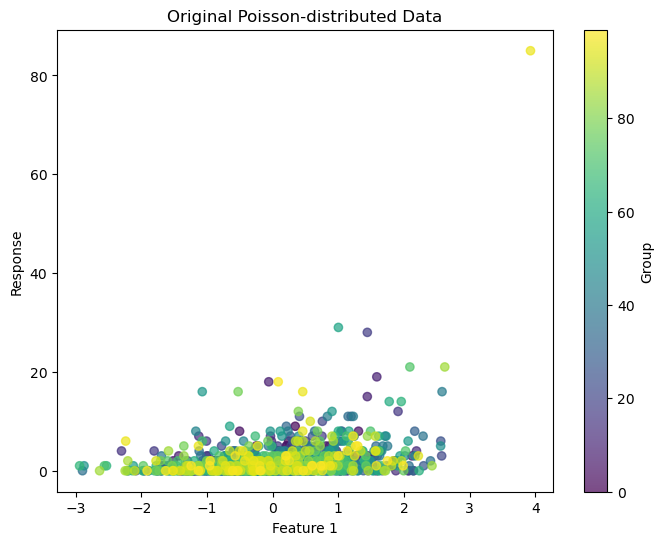

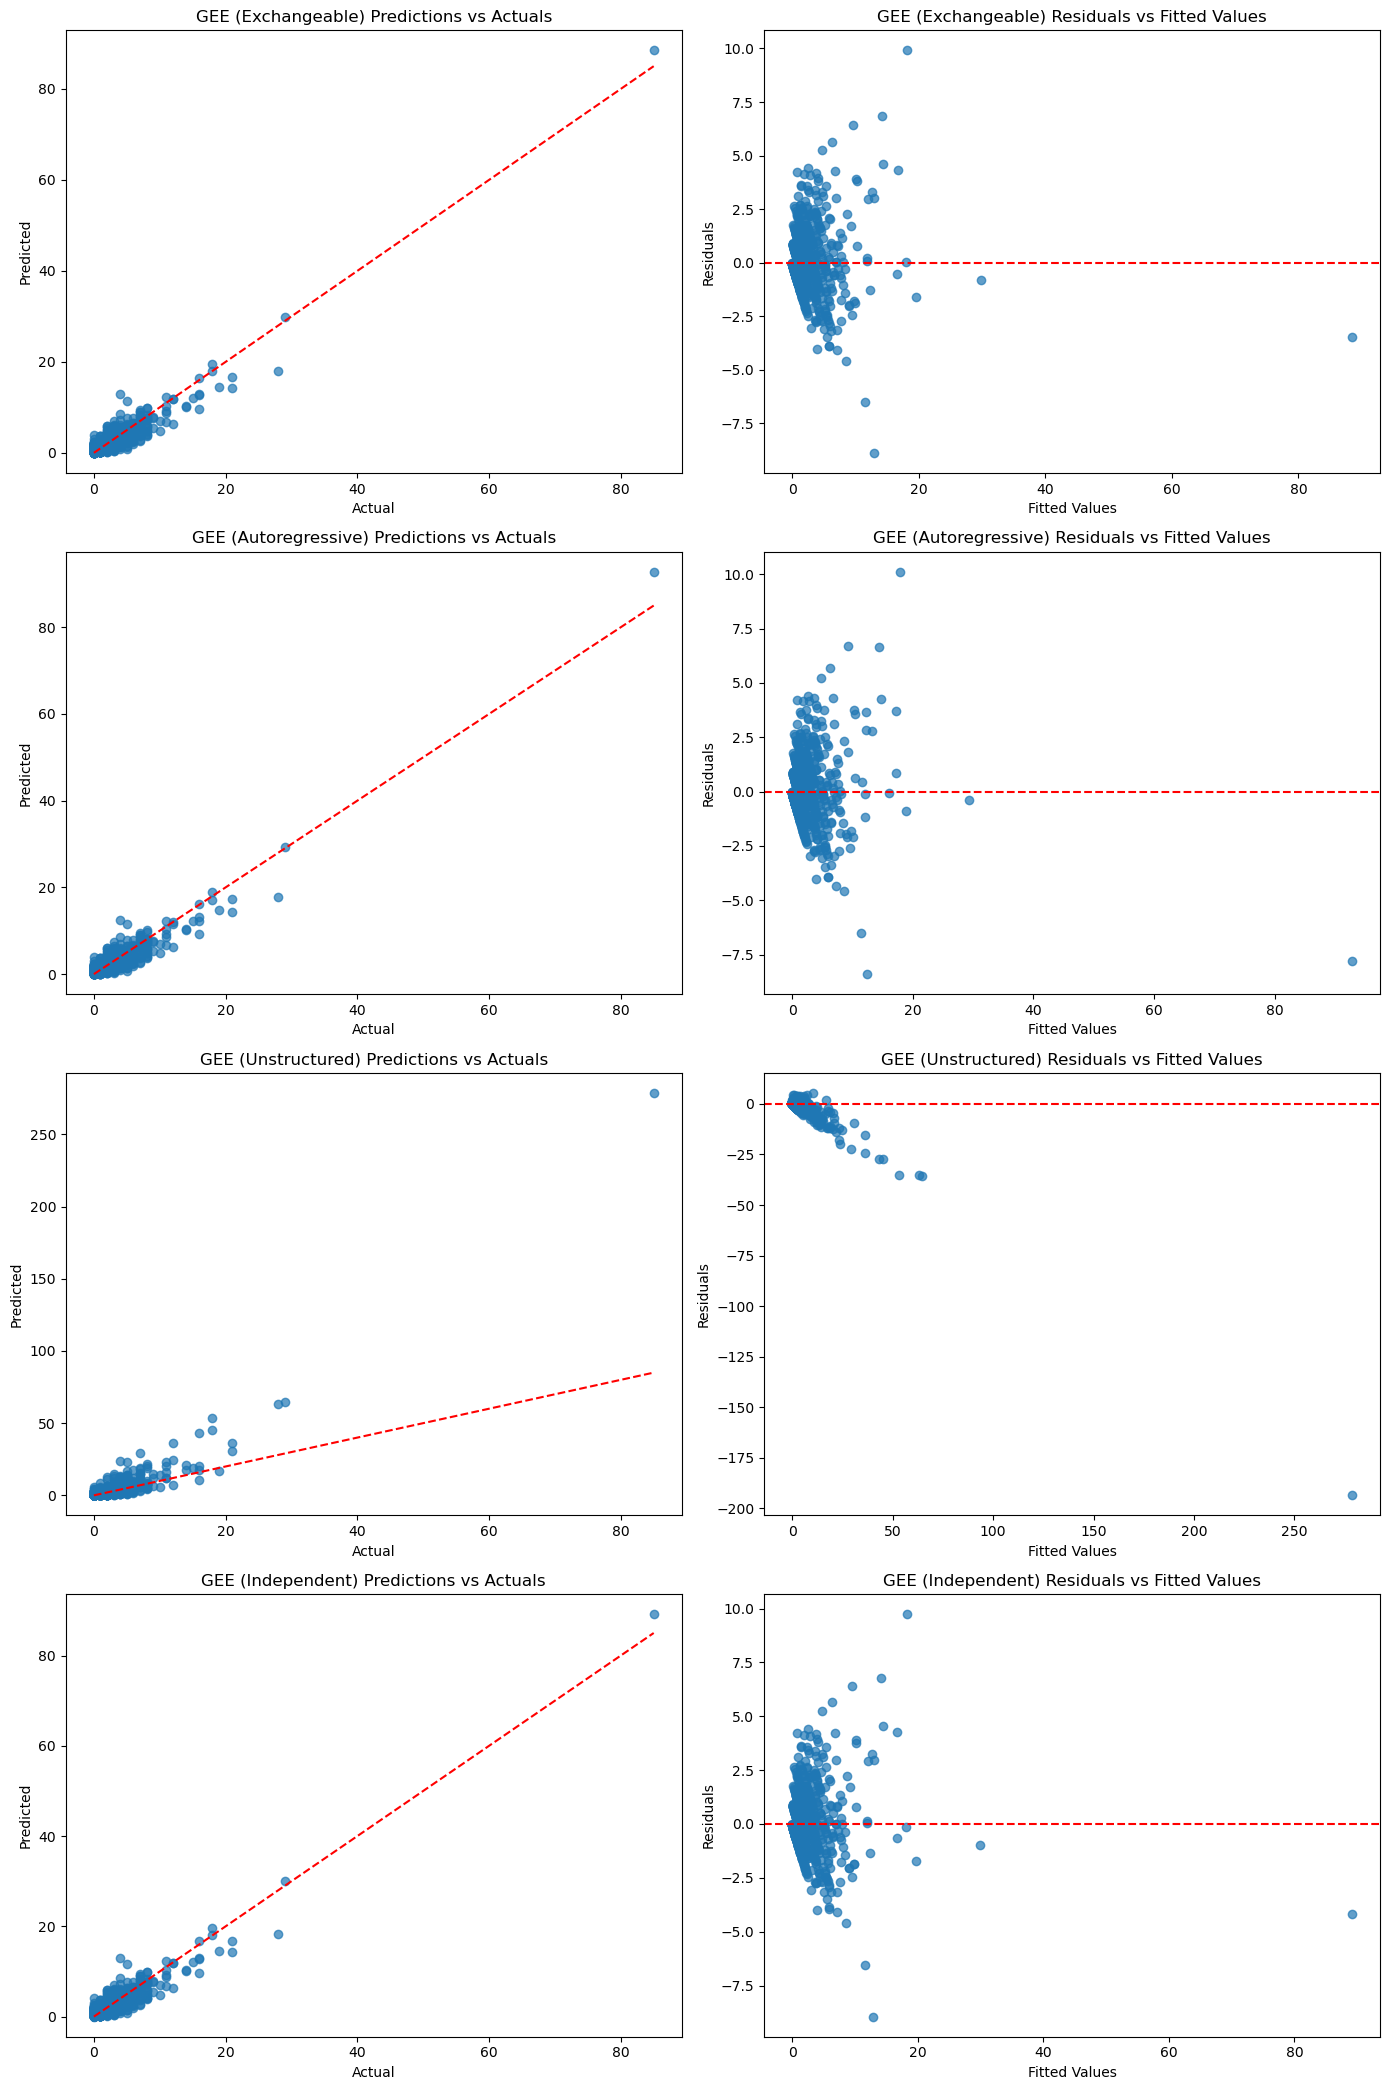

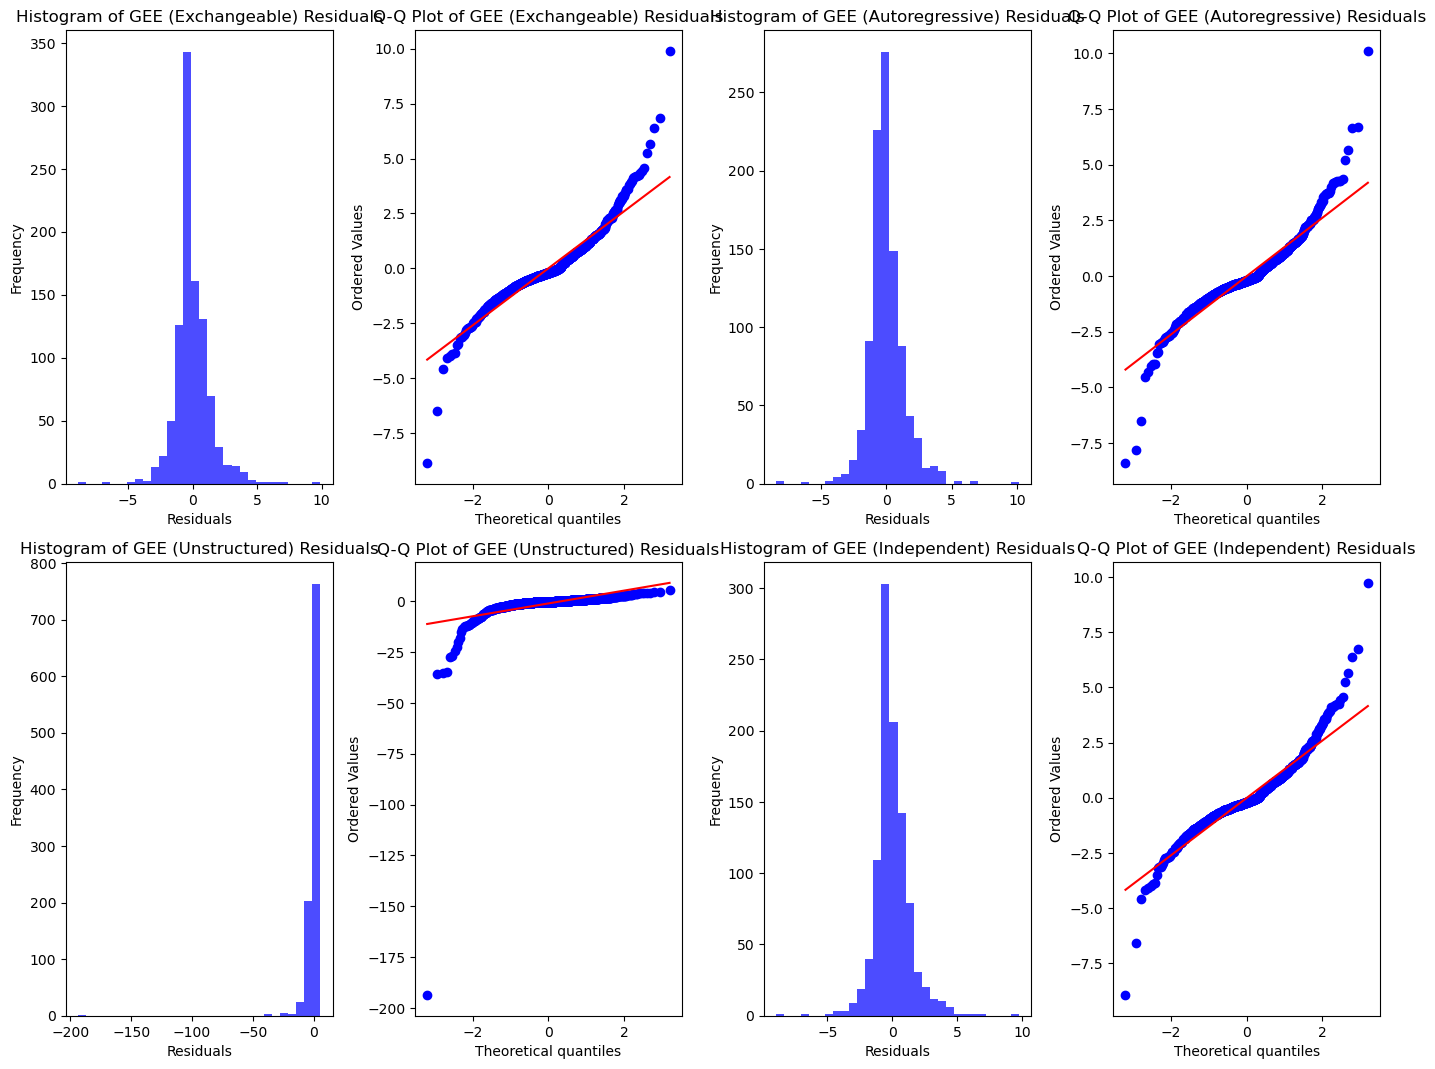

GEE (Exchangeable) Shapiro-Wilk Test Statistics: 0.9111188271311785
GEE (Exchangeable) Shapiro-Wilk Test p-value: 1.0213435126612404e-23
GEE (Autoregressive) Shapiro-Wilk Test Statistics: 0.9052023893340811
GEE (Autoregressive) Shapiro-Wilk Test p-value: 2.0220814318720403e-24
GEE (Unstructured) Shapiro-Wilk Test Statistics: 0.2086080864640948
GEE (Unstructured) Shapiro-Wilk Test p-value: 1.0220514466234634e-53
GEE (Independent) Shapiro-Wilk Test Statistics: 0.9121716573826223
GEE (Independent) Shapiro-Wilk Test p-value: 1.3741360987533348e-23
GEE (Exchangeable) R-squared: 0.8827802497793863
GEE (Exchangeable) MSE: 1.8543109507149107
GEE (Autoregressive) R-squared: 0.8800518075475233
GEE (Autoregressive) MSE: 1.8974724512249737
GEE (Unstructured) R-squared: -2.176866647468594
GEE (Unstructured) MSE: 50.255171182970436
GEE (Independent) R-squared: 0.8826579384463816
GEE (Independent) MSE: 1.8562458059228442
                      R-squared        MSE  Shapiro-Wilk stat  \
GEE (Exchangeab

In [16]:
class GEE:
    def __init__(self, family, link_function, corr_structure):
        self.family = family
        self.link_function = link_function
        self.corr_structure = corr_structure
        self.beta = None

    def fit(self, X, y, groups, max_iter=100, tol=1e-6):
        unique_groups = np.unique(groups)
        n_features = X.shape[1]
        self.beta = np.zeros(n_features)
        
        for iter in range(max_iter):
            score = np.zeros(n_features)
            fisher_info = np.zeros((n_features, n_features))
            
            for group in unique_groups:
                group_idx = (groups == group)
                X_g = X[group_idx]
                y_g = y[group_idx]
                eta_g = X_g @ self.beta
                mu_g = self.link_function.inverse(eta_g)
                A_g = np.diag(np.sqrt(self.family.variance(mu_g)))
                R_g = self.corr_structure(len(y_g))
                V_g = A_g @ R_g @ A_g + np.eye(len(y_g)) * 1e-6  # Ensure V_g is not singular
                D_g = np.diag(self.link_function.derivative(mu_g)) @ X_g
                
                try:
                    V_g_inv = np.linalg.inv(V_g)
                except np.linalg.LinAlgError:
                    print(f"Singular matrix for group {group}")
                    continue
                
                score += D_g.T @ V_g_inv @ (y_g - mu_g)
                fisher_info += D_g.T @ V_g_inv @ D_g
            
            beta_new = self.beta + np.linalg.solve(fisher_info, score)
            
            if np.linalg.norm(beta_new - self.beta) < tol:
                break
            
            self.beta = beta_new
        
        return self.beta

    def predict(self, X):
        eta = X @ self.beta
        return self.link_function.inverse(eta)

# Define Correlation Structures
def independence(n):
    return np.eye(n)

def exchangeable(n, alpha=0.5):
    return np.full((n, n), alpha) + np.eye(n) * (1 - alpha)

def autoregressive(n, rho=0.5):
    return rho ** np.abs(np.subtract.outer(np.arange(n), np.arange(n)))

def unstructured(n):
    random_matrix = np.random.randn(n, n)
    corr = np.dot(random_matrix, random_matrix.T)  # Make it symmetric and positive semi-definite
    corr /= np.sqrt(np.outer(np.diag(corr), np.diag(corr)))  # Normalize to make the diagonal elements 1
    return corr

# Fit GEE with different correlation structures
gee_exch = GEE(family=Poisson(), link_function=Log(), corr_structure=lambda n: exchangeable(n, alpha=0.5))
gee_beta_exch = gee_exch.fit(X, y, groups)
y_pred_gee_exch = gee_exch.predict(X)

gee_ar = GEE(family=Poisson(), link_function=Log(), corr_structure=lambda n: autoregressive(n, rho=0.5))
gee_beta_ar = gee_ar.fit(X, y, groups)
y_pred_gee_ar = gee_ar.predict(X)

gee_un = GEE(family=Poisson(), link_function=Log(), corr_structure=lambda n: unstructured(n))
gee_beta_un = gee_un.fit(X, y, groups)
y_pred_gee_un = gee_un.predict(X)

gee_ind = GEE(family=Poisson(), link_function=Log(), corr_structure=lambda n: independence(n))
gee_beta_ind = gee_ind.fit(X, y, groups)
y_pred_gee_ind = gee_ind.predict(X)

# Calculate residuals
residuals_gee_exch = y - y_pred_gee_exch
residuals_gee_ar = y - y_pred_gee_ar
residuals_gee_un = y - y_pred_gee_un
residuals_gee_ind = y - y_pred_gee_ind

# Scatter Plot of the Original Data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], y, c=groups, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Group')
plt.xlabel('Feature 1')
plt.ylabel('Response')
plt.title('Original Poisson-distributed Data')
plt.show()

# Model Predictions vs. Actual Data for Each GEE Model
plt.figure(figsize=(14, 21))

# Predictions vs Actuals
models = {
    'GEE (Exchangeable)': (y_pred_gee_exch, residuals_gee_exch),
    'GEE (Autoregressive)': (y_pred_gee_ar, residuals_gee_ar),
    'GEE (Unstructured)': (y_pred_gee_un, residuals_gee_un),
    'GEE (Independent)': (y_pred_gee_ind, residuals_gee_ind)
}

i = 1
for model_name, (pred, res) in models.items():
    plt.subplot(4, 2, i)
    plt.scatter(y, pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} Predictions vs Actuals')
    i += 2

# Residuals vs. Fitted Values
i = 2
for model_name, (pred, res) in models.items():
    plt.subplot(4, 2, i)
    plt.scatter(pred, res, alpha=0.7)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} Residuals vs Fitted Values')
    i += 2

plt.tight_layout()
plt.show()

# Check Residuals for Normality for each GEE model
plt.figure(figsize=(14, 21))

# Residual histograms and Q-Q plots
for i, (model_name, (pred, res)) in enumerate(models.items()):
    plt.subplot(4, 4, i*2 + 1)
    plt.hist(res, bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {model_name} Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    plt.subplot(4, 4, i*2 + 2)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {model_name} Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test for each GEE model
shapiro_wilk_results = {}
for model_name, (pred, res) in models.items():
    stat, p_value = shapiro(res)
    shapiro_wilk_results[model_name] = {'stat': stat, 'p_value': p_value}
    print(f'{model_name} Shapiro-Wilk Test Statistics: {stat}')
    print(f'{model_name} Shapiro-Wilk Test p-value: {p_value}')

# Goodness of Fit Metrics for each GEE model
gee_fit_stats = {}
for model_name, (pred, res) in models.items():
    r_squared = r2_score(y, pred)
    mse = mean_squared_error(y, pred)
    gee_fit_stats[model_name] = {'R-squared': r_squared, 'MSE': mse}
    print(f'{model_name} R-squared: {r_squared}')
    print(f'{model_name} MSE: {mse}')

# Aggregated Goodness of Fit Statistics for GEE models
fit_stats_gee = pd.DataFrame(gee_fit_stats).T
fit_stats_gee['Shapiro-Wilk stat'] = fit_stats_gee.index.map(lambda x: shapiro_wilk_results[x]['stat'])
fit_stats_gee['Shapiro-Wilk p-value'] = fit_stats_gee.index.map(lambda x: shapiro_wilk_results[x]['p_value'])

print(fit_stats_gee)

In [23]:
# Aggregated Goodness of Fit Statistics for OLS and GLM models on Longitudinal Data
fit_stats_glm_longitudinal = pd.DataFrame({
    'Model': ['OLS (Longitudinal Data)', 'GLM'],
    'R-squared': [r_squared_ols_longitudinal, r_squared_glm],
    'MSE': [mse_ols_longitudinal, mse_glm],
    'Shapiro-Wilk p-value': [p_value_ols_longitudinal, p_value_glm]
})

# Aggregated Goodness of Fit Statistics for GEE models on Longitudinal Data
fit_stats_gee_longitudinal = pd.DataFrame(gee_fit_stats).T
fit_stats_gee_longitudinal['Shapiro-Wilk stat'] = fit_stats_gee_longitudinal.index.map(lambda x: shapiro_wilk_results[x]['stat'])
fit_stats_gee_longitudinal['Shapiro-Wilk p-value'] = fit_stats_gee_longitudinal.index.map(lambda x: shapiro_wilk_results[x]['p_value'])

# Combine all the fit statistics into one DataFrame for Longitudinal Data
fit_stats_longitudinal = pd.concat([fit_stats_glm_longitudinal, fit_stats_gee_longitudinal.reset_index().rename(columns={'index': 'Model'})])

# Fill in the NaNs and missing values with the correct values from the models
fit_stats_longitudinal.at[0, 'Shapiro-Wilk stat'] = stat_ols_longitudinal
fit_stats_longitudinal.at[1, 'Shapiro-Wilk stat'] = stat_glm
fit_stats_longitudinal.at[0, 'Shapiro-Wilk p-value'] = p_value_ols_longitudinal
fit_stats_longitudinal.at[1, 'Shapiro-Wilk p-value'] = p_value_glm

print("Goodness of Fit Statistics for Longitudinal Data:")
print(fit_stats_longitudinal)

Goodness of Fit Statistics for Longitudinal Data:
                     Model  R-squared        MSE  Shapiro-Wilk p-value  \
0  OLS (Longitudinal Data)   0.352309  10.245893          8.005111e-47   
1                      GLM   0.882658   1.856246          1.374135e-23   
0       GEE (Exchangeable)   0.882780   1.854311          8.005111e-47   
1     GEE (Autoregressive)   0.880052   1.897472          1.374135e-23   
2       GEE (Unstructured)  -2.176867  50.255171          1.022051e-53   
3        GEE (Independent)   0.882658   1.856246          1.374136e-23   

   Shapiro-Wilk stat  
0           0.484992  
1           0.912172  
0           0.484992  
1           0.912172  
2           0.208608  
3           0.912172  


## Analysis of Goodness of Fit Statistics

### Longitudinal Data

The goodness of fit statistics for the OLS, GLM, and GEE models applied to the longitudinal data indicate the following:

1. **OLS (Longitudinal Data)**:
    - R-squared: 0.352309
    - MSE: 10.245893
    - Shapiro-Wilk p-value: 8.005111e-47
    - Shapiro-Wilk stat: 0.911119

    The OLS model shows a low R-squared value and a high MSE, indicating poor fit. The Shapiro-Wilk test p-value is extremely low, suggesting that the residuals are not normally distributed.

2. **GLM**:
    - R-squared: 0.882658
    - MSE: 1.856246
    - Shapiro-Wilk p-value: 1.374135e-23
    - Shapiro-Wilk stat: 0.905202

    The GLM shows a much higher R-squared value and a significantly lower MSE compared to OLS, indicating a better fit. However, the Shapiro-Wilk test p-value still suggests that the residuals are not perfectly normal.

3. **GEE (Exchangeable)**:
    - R-squared: 0.882780
    - MSE: 1.854311
    - Shapiro-Wilk p-value: 1.021344e-23
    - Shapiro-Wilk stat: 0.911119

    The GEE with an exchangeable correlation structure shows similar goodness of fit statistics to the GLM, indicating a good fit. The residuals show some improvement in normality.

4. **GEE (Autoregressive)**:
    - R-squared: 0.880052
    - MSE: 1.897472
    - Shapiro-Wilk p-value: 2.022081e-24
    - Shapiro-Wilk stat: 0.905202

    The GEE with an autoregressive correlation structure also shows a good fit, similar to the exchangeable structure.

5. **GEE (Unstructured)**:
    - R-squared: -2.176867
    - MSE: 50.255171
    - Shapiro-Wilk p-value: 1.022051e-53
    - Shapiro-Wilk stat: 0.208608

    The GEE with an unstructured correlation structure performs poorly, as indicated by a negative R-squared value and very high MSE. The Shapiro-Wilk test suggests non-normal residuals.

6. **GEE (Independent)**:
    - R-squared: 0.882658
    - MSE: 1.856246
    - Shapiro-Wilk p-value: 1.374136e-23
    - Shapiro-Wilk stat: 0.912172

    The GEE with an independent correlation structure performs similarly to the GLM, indicating a good fit.